In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
# real_intens_test=np.load('test_data/real_intens_test.npy') #Ground truth object
# real_phase_test=np.load('test_data/real_phase_test.npy') #Ground truth phase
# real_phase_test=real_phase_test*2*np.pi-np.pi #Map the phases back to -pi to pi range
ft_test=np.load('test_data/ft_test.npy') #Test diffraction data

# Plotting Helpers

In [3]:
%matplotlib inline
plt.style.use('seaborn-white')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 15
plt.viridis()

from matplotlib import ticker
tick_locator = ticker.MaxNLocator(nbins=3)

def make_cherukara_plot(X, intensities, phases, n_show=3, offset=0):
    fig_size = (12,12)
    h,w = 32,32

    f, axs = plt.subplots(n_show, 3, figsize=fig_size)
    for i in range(0,n_show):
        make_window(np.log10(X[i+offset]).reshape(h,w), axs[i,0])
        make_window(intensities[i+offset].reshape(h,w), axs[i,1])
        make_window(phases[i+offset].reshape(h,w), axs[i,2])
        
    axs[0,0].set_title("Diffraction Pattern")
    axs[0,1].set_title("Structure (Pred)")
    axs[0,2].set_title("Phase (Pred)")
    
def make_window(data, ax):
    im = ax.imshow(data)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    cb=plt.colorbar(im, ax=ax)
    cb.locator = tick_locator
    cb.update_ticks()

<Figure size 432x288 with 0 Axes>

In [6]:
from dlhub_sdk.client import DLHubClient

# Instantiate the DLHub client and find the model IDs
dl = DLHubClient()
structure_model = dl.get_id_by_name("cherukara_structure")
phase_model = dl.get_id_by_name("cherukara_phase")

# Load testing data
n_test = 10
intensity_threshold = 0.2
X = ft_test[0:n_test].tolist()

# Call to DLHub to get predictions
intensities = np.asarray(dl.run(structure_model, X))
phases = np.asarray(dl.run(phase_model, X))*2*np.pi-np.pi

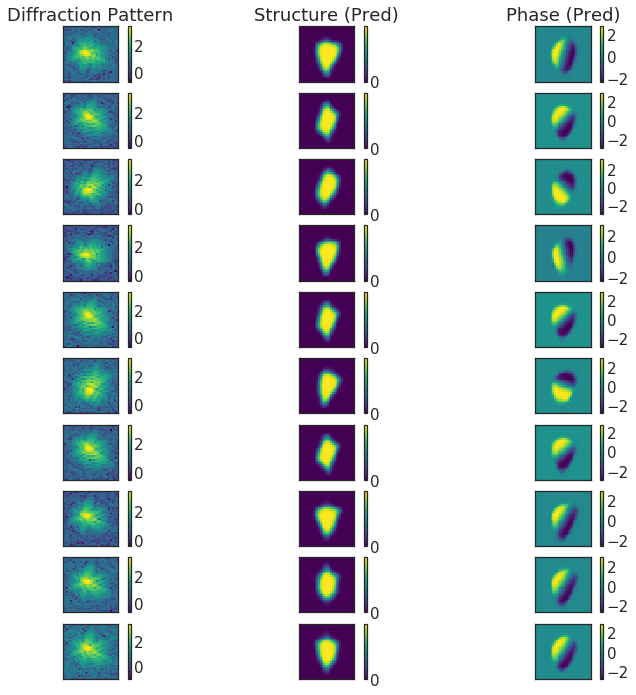

In [7]:
make_cherukara_plot(X, intensities, phases, n_show=n_test)